In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as skms 
import sklearn.preprocessing as skpp


### Exercise 1



In [2]:
data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/Salary_Data.csv')

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
# convert df into array
my_mat = np.array(data)
my_x_values = my_mat[:,0].reshape(-1,1)
my_y_values = my_mat[:,1].reshape(-1,1)

# Randomly split the data into training/testing sets: 80 : 20
X_train, X_test, y_train, y_test = skms.train_test_split(my_x_values, my_y_values, test_size = 0.2)


### Linear regression

In [6]:
# train
# from sklearn.linear_model import LinearRegression
lin_model = linear_model.LinearRegression(normalize=True)
my_lin_model = lin_model.fit(X_train,y_train)


In [7]:
# predict
predicted_y = my_lin_model.predict(X_test)


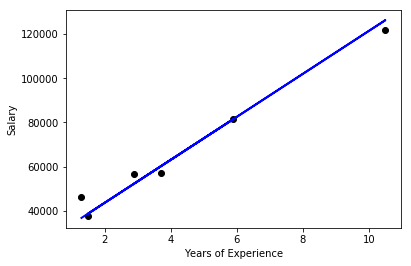

In [9]:
# plot model
plt.scatter(X_test, y_test,  color = 'black')
plt.plot(X_test,predicted_y, linewidth = 2, color = 'blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
None

In [ ]:
# Plot 
plt.scatter(y_test, predicted_y,  color='black')
plt.plot(predicted_y,predicted_y)
plt.xlabel('Real salaries')
plt.ylabel('Predicted salaries')
None

### Polynomial regression

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

model_results = pd.DataFrame(columns = ['degree2','degree3','degree4'])
error_results = []
R2_results = []

for i in range(2,5):
    # create model with X degrees
    # returns array of values: to power 0, to power 1, to power 2, etc
    curr_poly_model = skpp.PolynomialFeatures(degree = i)

    # transform input variables:
    X_transformed = curr_poly_model.fit_transform(X_train)

    # fit linear model using the transformed X values:
    curr_lin_model = linear_model.LinearRegression(normalize=True) # creates new model object!

    curr_model_fit = curr_lin_model.fit(X_transformed,y_train)

    # TEST model:

    # transform test X values:
    X_test_transformed = curr_poly_model.fit_transform(X_test)

    # predict y values with curr model:
    curr_predicted_y = curr_model_fit.predict(X_test_transformed)
    
    # calculate mean square error and R2
    curr_error = mean_squared_error(curr_predicted_y, y_test)
    error_results.append(curr_error)
    
    curr_R2 = r2_score(curr_predicted_y, y_test)
    R2_results.append(curr_R2)
 
    # append predicted y values
    model_results['degree'+str(i)] = curr_predicted_y.flatten()
    

In [ ]:
# add more data
model_results['real'] = y_test
model_results['linear_pred'] = predicted_y

In [ ]:
model_results

### Choose best model

to evaluate models, you have to chooose metric: either simple (R2, MSerror)

or very complex metric. depends what you want to minimize, either false positives, or false negatives, etc

In [ ]:
# function to plot results
def plot_line_model(y_test, predicted_y):
    # Plot 
    plt.scatter(y_test, predicted_y,  color='black')
    plt.plot(predicted_y,predicted_y)
    plt.xlabel('Real salaries')
    plt.ylabel('Predicted salaries')
    

In [ ]:
plot_line_model(model_results['real'], model_results['degree4'])

In [ ]:
# calculate for first lin model, add to list
error_lin = mean_squared_error(predicted_y, y_test)
error_results.insert(0,error_lin)

R2_lin = r2_score(predicted_y, y_test)
R2_results.insert(0,R2_lin)

In [ ]:
# plot mean squared errors and R2:

plt.subplot(1,2,1)
plt.scatter(range(1,5),error_results)
plt.title('Mean square errors')
plt.xticks(range(1,5), ['linear','degree 2','degree 3','degree 4'], rotation=45)

plt.subplot(1,2,2)
plt.scatter(range(1,5),R2_results)
plt.xticks(range(1,5), ['linear','degree 2','degree 3','degree 4'], rotation=45)
plt.title('R2')

None

## Exercise 2:

In [ ]:
wine_data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/winequality-white.csv', sep = ';')
wine_data.head(5)

In [ ]:
alc_predictors = wine_data.drop(columns = ['alcohol'])
alc_predictors.head(5)

In [ ]:
# dependant variable
alc = wine_data['alcohol']

In [ ]:
# Randomly split the data into training/testing sets: 80 : 20
X_train, X_test, y_train, y_test = skms.train_test_split(alc_predictors, alc, test_size = 0.2)


### train linear regression model

In [ ]:
# train model
lin_model_alc = linear_model.LinearRegression(normalize=True)
alc_model = lin_model_alc.fit(X_train,y_train)


In [ ]:
# predict
alc_predict = alc_model.predict(X_test)


In [ ]:
plt.scatter(y_test, alc_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(alc_predict,alc_predict, color = 'red')
plt.title('Alcohol prediction without cross validation')
None

In [ ]:
r2_score_alc = r2_score(y_test, alc_predict)
error_alc = mean_squared_error(y_test, alc_predict)

print('R2 = %.2f' % r2_score_alc)
print('MSError = %.04f' % error_alc)

### train linear regression model with 5 fold cross validation

In [ ]:
# x fold cross validation: split train data
alc_scores = skms.cross_val_score(lin_model_alc, X_train, y_train, cv = 5)

print("Mean Model Accuracy:", np.array(alc_scores).mean())

In [ ]:
alc_scores

### exchange value, train again with cross validation

In [ ]:
# get predictors with chlorides changed
alc_predictors_alt = wine_data.drop(columns = ['alcohol'])
chlorides_data = alc_predictors_alt['chlorides']
chlorides_new = 1 / chlorides_data
alc_predictors_alt['chlorides'] = chlorides_new

In [ ]:
# Randomly split the data into training/testing sets: 80 : 20
X_train_new, X_test_new, y_train_new, y_test_new = skms.train_test_split(alc_predictors_alt, alc, test_size = 0.2)


In [ ]:
# x fold cross validation: split train data
alc_scores_new = skms.cross_val_score(lin_model_alc, X_train_new, y_train_new, cv = 5)

print("Mean Model Accuracy:", np.array(alc_scores_new).mean())

### Boxcox 

only works for positive numbers!

--> add constant to col, or take absolute numbers

if you transform y values as well, you cant compare models to the ones before! MSerror will change.

In [ ]:
apply(stats.boxcox, )